# Questão número 1 da prova
Controle 2 2020/2

Aluno: Jhonatan de Freitas Lang


In [3]:
pip install control

     |████████████████████████████████| 348kB 5.3MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=5d28d4dc2539b97f2678796775aae7be2f43f01c48264a1691c3da4f7c61be81
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [4]:
import numpy as np
import sympy as sp
import control                   
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

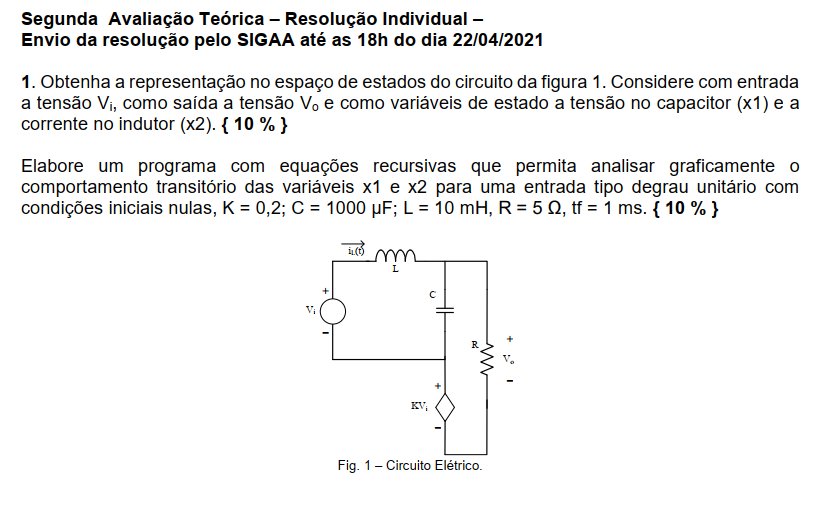

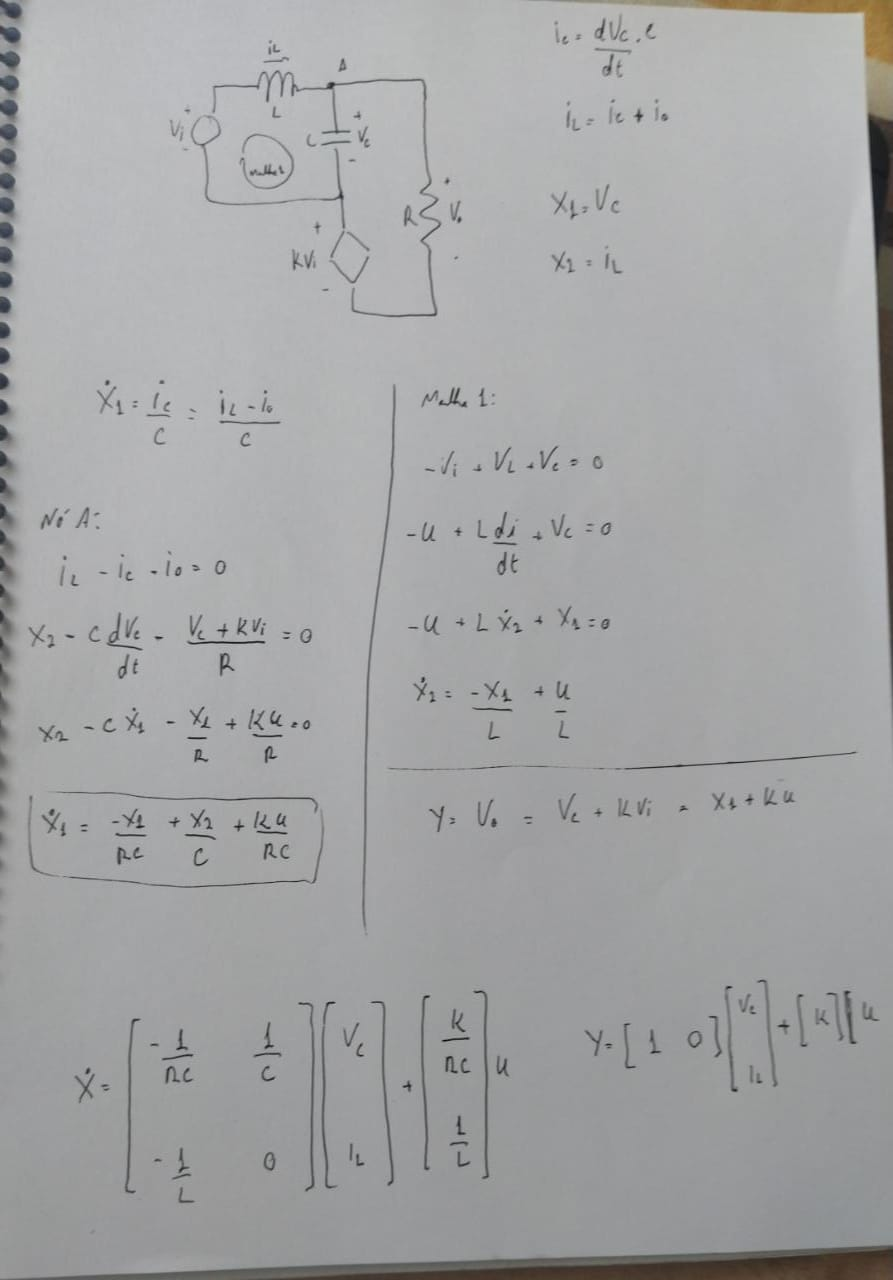

In [5]:
# Declaração de variáveis

K = 0.2;
C = 1000e-6;
L = 10e-3;
R = 5;

tfinal = 1e-3;




# Matrizes de estados cálculadas 
# X1 = Vc1; X2 = iL
A = np.block([[-1/(R*C), 1/C ],[ -1/L , 0 ]])
B = np.block([[K/(R*C) ],[ 1/L ]])
C = np.block([[1, 0]])
D = K;

#conversão para função de transferência

# sistema no espaço de estados
sys = control.ss(A,B,C,D);

# convertendo para função de tranferência com a utilização da função ss2tf
G = control.ss2tf(sys);
[[n]],[[d]] = control.tfdata(G);

G

TransferFunction(array([2.0e-01, 8.0e+01, 1.2e+05]), array([1.e+00, 2.e+02, 1.e+05]))

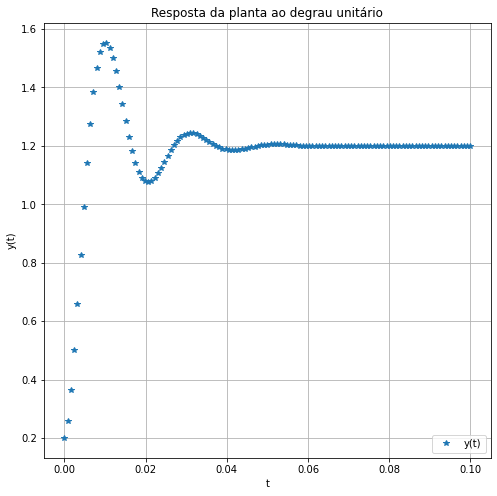

In [9]:
# resposta para entrada ao degrau
Y, t_y = control.matlab.step(sys,0.1);
fig, ((ax1) ) = plt.subplots(1, 1)
fig.set_size_inches(8,8)

ax1.plot(t_y,Y,'*')
ax1.set_title("Resposta da planta ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("y(t)")
ax1.legend(['y(t)'],loc="lower right")
ax1.grid(True,'both')

In [14]:
C[0,0]

1

In [21]:
# equações recursivas


Ts = 1e-3
Fs = 1/Ts
tfinal = 0.1;


Kmax = int((tfinal/Ts)+1);

t =np.linspace(0, tfinal, Kmax);



# declaração dos vetores
u = np.ones(Kmax);
x1 = np.zeros(Kmax);
x2 = np.zeros(Kmax);



x1_ponto = np.zeros(Kmax);
x2_ponto = np.zeros(Kmax);

y = np.zeros(Kmax);

#condições iniciais
j=0

# Equação diferencial de estados:  Xponto=A*X+B*U
x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j]; 

# Equação de Saída: Y=C*X+D*U
y[j] = C[0,0]*x1[j] + C[0,1]*x2[j] + D*u[j];



for j in range(1,Kmax):
    # Equações dos integradores
    x1[j] = Ts*x1_ponto[j-1] + x1[j-1];
    x2[j] = Ts*x2_ponto[j-1] + x2[j-1];    

    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
    x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j]; 

    # Equação de Saída: Y=C*X+D*U
    y[j] = C[0,0]*x1[j] + C[0,1]*x2[j] + D*u[j];



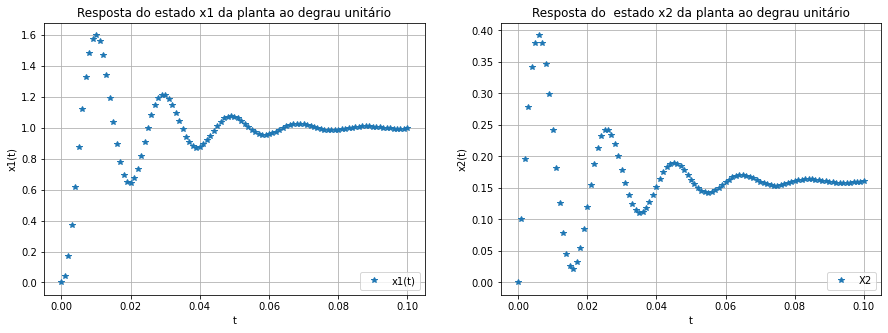

In [23]:
# resposta para entrada ao degrau
fig, ((ax1, ax2) ) = plt.subplots(1, 2)
fig.set_size_inches(15,5)

ax1.plot(t,x1,'*')
ax1.set_title("Resposta do estado x1 da planta ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("x1(t)")
ax1.legend(['x1(t)'],loc="lower right")
ax1.grid(True,'both')

ax2.plot(t,x2,'*')
ax2.set_title("Resposta do  estado x2 da planta ao degrau unitário")
ax2.set_xlabel("t")
ax2.set_ylabel("x2(t)")
ax2.legend(['X2','X~2'],loc="lower right")
ax2.grid(True)

Vale resaltar que essa oscilação do sinal poderia ser menor caso o período de amostragem fosse mais curto.